In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ge = pd.read_csv('data/barton/Barton_combined.csv')

In [3]:
ge

,Gene,Snf2_rep01,Snf2_rep02,Snf2_rep03,Snf2_rep04,Snf2_rep05,Snf2_rep06,Snf2_rep07,Snf2_rep08,Snf2_rep09,...,WT_rep39,WT_rep40,WT_rep41,WT_rep42,WT_rep43,WT_rep44,WT_rep45,WT_rep46,WT_rep47,WT_rep48
0,15S_rRNA,4,2,5,5,46,3,5,4,2,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,31,18,23,44,356,62,35,33,13,...,10,274,49,30,72,58,21,159,107,70
2,HRA1,5,1,3,1,2,1,1,4,4,...,5,3,6,5,2,2,2,5,2,1
3,ICR1,205,196,211,252,127,146,275,160,190,...,85,177,137,118,113,81,142,94,187,106
4,LSR1,210,103,159,260,298,522,303,96,132,...,66,385,232,149,114,81,109,132,243,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7122,tY(GUA)M1,0,0,1,0,2,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
7123,tY(GUA)M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


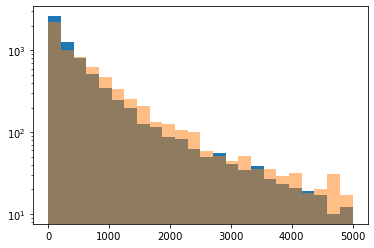

In [10]:
h = plt.hist(ge['WT_rep08'],bins=np.linspace(0,5000,25))
h = plt.hist(ge['WT_rep25'],bins=np.linspace(0,5000,25),alpha=.5)
plt.yscale('log')

/var/folders/9_/196qp2y96mn8bv8k2htffl5c0000gn/T/ipykernel_1931/4038638483.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.hist(ge.median(axis=0).values[1:])


(array([ 8.,  9., 31., 16., 11., 12.,  3.,  2.,  2.,  1.]),
 array([216. , 270.3, 324.6, 378.9, 433.2, 487.5, 541.8, 596.1, 650.4,
        704.7, 759. ]),
 <BarContainer object of 10 artists>)

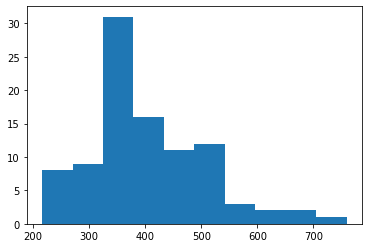

In [17]:
plt.hist(ge.median(axis=0).values[1:])

In [61]:
cols = ['WT_rep01','Snf2_rep01']

df = ge[cols].copy()

In [62]:
df['Min'] = df[cols].min(axis=1)

In [63]:
df = df[df.Min >= 100].copy()

In [64]:
df['Ratio'] = np.log2(df[cols[1]] / df[cols[0]])

(array([4.000e+00, 6.000e+00, 1.000e+01, 7.200e+01, 1.290e+02, 1.120e+03,
        3.257e+03, 5.900e+02, 2.600e+01, 2.000e+00]),
 array([-5.14399705, -4.33997774, -3.53595843, -2.73193912, -1.92791981,
        -1.12390049, -0.31988118,  0.48413813,  1.28815744,  2.09217675,
         2.89619606]),
 <BarContainer object of 10 artists>)

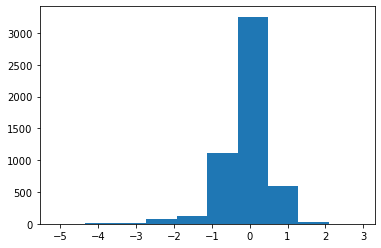

In [65]:
plt.hist(df.Ratio)

In [38]:
df.sum(axis=0)

WT_rep01      5.907184e+06
Snf2_rep01    1.005066e+07
Min           5.673856e+06
Ratio         5.330261e+03
dtype: float64

In [39]:
df['Ratio'].median()

1.178563919716185

In [40]:
np.power(2,df['Ratio'].median())

2.2635135135135136

In [41]:
ge

,Gene,Snf2_rep01,Snf2_rep02,Snf2_rep03,Snf2_rep04,Snf2_rep05,Snf2_rep06,Snf2_rep07,Snf2_rep08,Snf2_rep09,...,WT_rep39,WT_rep40,WT_rep41,WT_rep42,WT_rep43,WT_rep44,WT_rep45,WT_rep46,WT_rep47,WT_rep48
0,15S_rRNA,4,2,5,5,46,3,5,4,2,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,31,18,23,44,356,62,35,33,13,...,10,274,49,30,72,58,21,159,107,70
2,HRA1,5,1,3,1,2,1,1,4,4,...,5,3,6,5,2,2,2,5,2,1
3,ICR1,205,196,211,252,127,146,275,160,190,...,85,177,137,118,113,81,142,94,187,106
4,LSR1,210,103,159,260,298,522,303,96,132,...,66,385,232,149,114,81,109,132,243,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7122,tY(GUA)M1,0,0,1,0,2,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
7123,tY(GUA)M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [45]:
cols_wt = [c for c in ge.columns if c.startswith('WT')]
cols_mut = [c for c in ge.columns if c.startswith('Snf2')]
cols_all = cols_wt + cols_mut

In [66]:
ge['mean'] = ge[cols_all].mean(axis=1)

In [67]:
ge

,Gene,Snf2_rep01,Snf2_rep02,Snf2_rep03,Snf2_rep04,Snf2_rep05,Snf2_rep06,Snf2_rep07,Snf2_rep08,Snf2_rep09,...,WT_rep40,WT_rep41,WT_rep42,WT_rep43,WT_rep44,WT_rep45,WT_rep46,WT_rep47,WT_rep48,mean
0,15S_rRNA,3.032717,1.933884,4.868065,3.632473,55.509049,2.282264,3.067439,4.354810,1.659111,...,40.303002,8.870370,5.215847,15.771749,17.982451,0.894130,38.225789,9.863058,4.925504,19.287143
1,21S_rRNA,23.503553,17.404955,22.393101,31.965761,429.591771,47.166787,21.472073,35.927179,10.784223,...,225.367808,48.294236,39.118854,103.233265,86.915179,18.776722,276.268202,87.945604,86.196312,112.864031
2,HRA1,3.790896,0.966942,2.920839,0.726495,2.413437,0.760755,0.613488,4.354810,3.318222,...,2.467531,5.913580,6.519809,2.867591,2.997075,1.788259,8.687679,1.643843,1.231376,2.652195
3,ICR1,155.426725,189.520626,205.432360,183.076631,153.253244,111.070176,168.709145,174.192383,157.615565,...,145.584314,135.026740,153.867492,162.018875,121.381542,126.966404,163.328371,153.699327,130.525844,148.835076
4,LSR1,159.217620,99.595023,154.804480,188.888587,359.602101,397.113918,185.886804,104.515430,109.501340,...,316.666445,228.658422,194.290308,163.452670,121.381542,97.460127,229.354734,199.726932,157.616113,218.222079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,0.758179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.088702,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150948
7122,tY(GUA)M1,0.000000,0.000000,0.973613,0.000000,2.413437,0.000000,0.000000,0.000000,0.000000,...,0.822510,0.985597,0.000000,1.433795,0.000000,0.000000,0.000000,0.821922,0.000000,0.386305
7123,tY(GUA)M2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113681
7124,tY(GUA)O,0.000000,0.966942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.985597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.231376,0.119459


(array([2.289e+03, 1.189e+03, 9.310e+02, 6.150e+02, 3.840e+02, 3.040e+02,
        2.100e+02, 1.780e+02, 1.320e+02, 1.030e+02, 8.800e+01, 6.000e+01,
        6.700e+01, 4.800e+01, 4.000e+01, 4.100e+01, 2.700e+01, 2.000e+01,
        2.800e+01, 2.100e+01, 2.100e+01, 1.600e+01, 1.800e+01, 1.200e+01,
        1.200e+01, 1.200e+01, 6.000e+00, 1.000e+01, 9.000e+00, 9.000e+00,
        6.000e+00, 4.000e+00, 6.000e+00, 9.000e+00, 5.000e+00, 6.000e+00,
        8.000e+00, 4.000e+00, 5.000e+00, 6.000e+00, 2.000e+00, 9.000e+00,
        3.000e+00, 6.000e+00, 9.000e+00, 1.000e+00, 8.000e+00, 2.000e+00,
        5.000e+00]),
 array([    0.        ,   204.08163265,   408.16326531,   612.24489796,
          816.32653061,  1020.40816327,  1224.48979592,  1428.57142857,
         1632.65306122,  1836.73469388,  2040.81632653,  2244.89795918,
         2448.97959184,  2653.06122449,  2857.14285714,  3061.2244898 ,
         3265.30612245,  3469.3877551 ,  3673.46938776,  3877.55102041,
         4081.63265306,  42

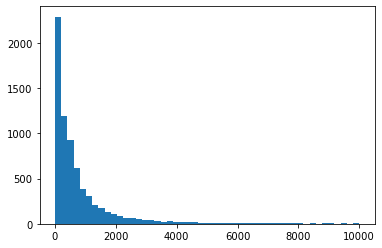

In [68]:
plt.hist(ge['mean'],bins=np.linspace(0,10000,50))

In [69]:
df = ge[ge['mean'] >= 100]

In [70]:
df

,Gene,Snf2_rep01,Snf2_rep02,Snf2_rep03,Snf2_rep04,Snf2_rep05,Snf2_rep06,Snf2_rep07,Snf2_rep08,Snf2_rep09,...,WT_rep40,WT_rep41,WT_rep42,WT_rep43,WT_rep44,WT_rep45,WT_rep46,WT_rep47,WT_rep48,mean
1,21S_rRNA,23.503553,17.404955,22.393101,31.965761,429.591771,47.166787,21.472073,35.927179,10.784223,...,225.367808,48.294236,39.118854,103.233265,86.915179,18.776722,276.268202,87.945604,86.196312,112.864031
3,ICR1,155.426725,189.520626,205.432360,183.076631,153.253244,111.070176,168.709145,174.192383,157.615565,...,145.584314,135.026740,153.867492,162.018875,121.381542,126.966404,163.328371,153.699327,130.525844,148.835076
4,LSR1,159.217620,99.595023,154.804480,188.888587,359.602101,397.113918,185.886804,104.515430,109.501340,...,316.666445,228.658422,194.290308,163.452670,121.381542,97.460127,229.354734,199.726932,157.616113,218.222079
52,RUF20,179.688457,105.396675,140.200284,142.392935,149.633089,86.726028,167.482170,108.870240,127.751563,...,138.181721,138.969127,136.915989,202.165144,44.956127,92.095350,187.653873,131.507445,108.361078,135.174916
56,RUF5-1,357.860557,209.826408,259.954693,297.136278,351.155072,286.804496,379.748949,327.699421,242.230237,...,312.553894,321.304506,256.880474,794.322624,152.850831,284.333215,344.032101,288.494458,430.981559,347.780492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6798,snR63,101.596005,68.652880,71.073755,70.469973,98.950914,201.599978,82.207365,94.717108,85.444227,...,115.151435,103.487648,131.700142,151.982307,95.906404,116.236849,147.690548,132.329367,92.353191,107.302166
6820,snR82,136.472246,109.264443,113.912730,145.298913,159.286837,206.925260,117.176170,124.112073,125.262896,...,104.458801,94.617278,87.365441,110.402242,43.457589,66.165591,90.351865,87.123682,82.502184,114.402867
6822,snR84,116.001409,99.595023,76.915433,100.256250,130.325594,28.147921,99.998512,100.160620,97.058006,...,101.168760,128.127564,103.012982,137.644354,73.428340,131.437052,97.302008,110.137485,137.914099,110.898810
6824,snR86,1006.861905,867.346948,1034.950705,919.015627,1128.281759,1139.610440,1077.898067,896.002072,720.883821,...,925.324028,764.822997,773.249347,1263.173704,654.860914,711.727168,1134.610918,858.908001,1008.496849,934.369531


In [71]:
for c in cols_all:
    mrat = np.median(df[c] / df['mean'])
    ge[c] = ge[c] / mrat

In [90]:
ge['WT_mean'] = ge[cols_wt].mean(axis=1)
ge['Snf2_mean'] = ge[cols_mut].mean(axis=1)

In [91]:
plt_data = ge[ge[cols_all].min(axis=1) > 25]

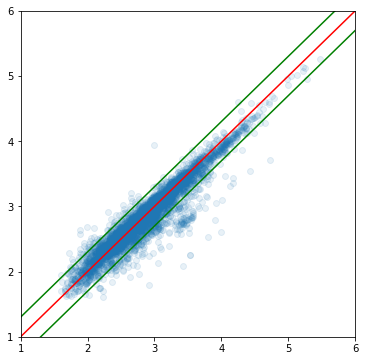

In [92]:
plt.figure(figsize=(6,6))
plt.scatter(np.log10(plt_data['WT_mean']),np.log10(plt_data['Snf2_mean']),alpha=.1)
plt.xlim(1,6)
plt.ylim(1,6)
x = np.linspace(1,6,100)
plt.plot(x,x,color='red')
plt.plot(x,x+np.log10(2),color='green')
plt.plot(x,x-np.log10(2),color='green')